# Exercise with Theis wells

## Interpreting pumping tests

### Partially worked out in class on  2019-01-11

In this notebook we do the following:

1. Show how a drawdown is computed for a transient well in a uniform aquifer (Theis)
2. Show how the Theis and Hantush well functions can be implemented by direct integration as expressed in their mathematical representations.
3. Compare them with the exponential integral `exp1(..)` in module `scipy.signal`.
4. Interpret a pumping test, using the horizontal and vertical shift of the Theis type cure such that it matches the data (both on double logarthmic graphs.
5. Interpret the same test using drawdown per log-cycle and the intersection of the simple logartihmic approximation of the Theis curve with zero drawdown on a graph with linear drawdown axis and logarithmide $t/r^2$ axis.

## Computing a well drawdown with the Theis formula

The Theis well function is, in fact, the exponential intergral that lives in `scipy.special` as `exp1`.

#### Import modules that we will need

In [34]:
import numpy as np
from scipy.special import exp1 # this is Theis's well function (exponential integral)
import matplotlib.pyplot as plt

#### Simple example, just compute the drawdown given $kD$, $S$, $r$ and $t$ using `exp1(..)`

In [ ]:
# Aquifer properties
kD = 900 # m2/d
S = 0.25 # [-]

# Only for semi-confined (Hantush) flow we need the resistance of the overlying layer
c  = 300 # d
lamb = np.sqrt(kD * c) # characteristic length of semi-confined system.

In [21]:
# Parameters specifying the case
Q = 1200 # m3/d
r = 350 # m
t = 1.2 # d

# compute u from the ordinary parameters
u = r**2 * S / (4 * kD * t)

# compute the drawdown using function exp1 (=exponential integral)
s = Q/(4 * np.pi * kD) * exp1(u)

print('Drawdown s = {:.4g} m'.format(s))

Drawdown s = 1.076 m


By superposition you may know compute the combined drawdown due to an arbitrary number of wells at arbitraty position and arbitrary times.

## Theis type curve

The Theis type curve is the Theis well function. It's the exponential integral
$$ exp1 = \intop _u ^\infty \frac {e^{-y}) y dy $$
and lives in the module `scipy.special`. It was already imported above.

To show the type curve, we may just plot it.

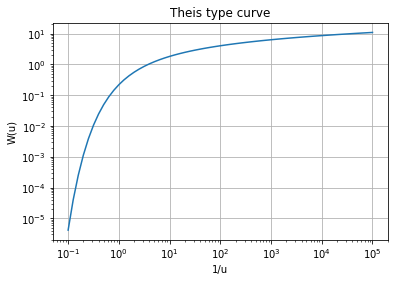

In [46]:
# get u values to use on the x-axis
u = np.logspace(-5, 1, 61)

# set up the figure
plt.title('Theis type curve')
plt.xlabel('1/u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(1/u, exp1(u)) # plot well function versus 1/u

plt.show()

## Compute Theis' and Hantush' well function by integration

### Theis and Hantush

Theis (1935) well function:
$$ W(u) = exp1(u) = \intop_u ^\infty \frac {e^{-y}} {y} dy $$

Hantush (1956) well function
$$ W_h(u) = \intop_u ^\infty \frac {e^{-y - \frac {\left( \frac {\rho} 2 \right)^2} y}} y dy $$

Hantush' well function is not available in the scipy-special module. Therefore, we have to implement it ourselves. This may be done in a very basis way, by numerically evaluating the integra. Below we'll do that for both the Theis and Hantush functions and compare them with the `exp1` from the `scipy.special` module to check.

In [42]:
def W(u):
    '''Return Theis well function value'''
    y = np.logspace(np.log10(u), 20, 5000)
    arg = np.exp(-y) / y
    dy = np.diff(y)
    return np.sum(0.5 * (arg[:-1] + arg[1:]) * dy)

def Wh(u, rho):
    '''Return Hantush well function value'''
    y = np.logspace(np.log10(u), 20, 5000)
    arg = np.exp(-y - (rho/2)**2 / y) / y
    dy = np.diff(y)
    return np.sum(0.5 * (arg[:-1] + arg[1:]) * dy)

# verify

u = 0.1  # choose any u
r = 1000 # choose some distance

print('exp1(u)    =',exp1(u),', From sicpy.special')
print('W(u))      =',W(u),', Evaluated Theis integral')
print('Wh(u, rho) =',Wh(u, r/lamb),', Evaluated Hantush integral. Note: rho = r/lambda') # we already had a value for lambda

exp1(u)    = 1.8229239584193906 , From sicpy.special
W(u))      = 1.8229742553684722 , Evaluated Theis integral
Wh(u, rho) = 0.24998993620609194 , Evaluated Hantush integral. Note: rho = r/lambda


Try $rho \rightarrow 0$, i.e. $r \rightarrow 0$ or $\lambda \rightarrow \infty$. Note also that $\lambda \rightarrow \infty$ is equivalent to $c \rightarrow \Infty$ which means that the  aquitard covering the aquifer becomes impermeable and, therefore, the aquifer itself the becomes confined and so $W_h(u, \rho \rightarrow 0) \rightarrow W(u) $

We don't use Hantush in the rest of this notebook, because the aquifer was confined.

# Intepret a real-world pumping test in a confined aquifer

Pumping tests are done to get values for the aquifer properties. In the case of a confined aquifer, the drawdowns are expected to closely resemble the Theis type curve.

The classical way uses the Theis curve (axes are $1/u$ and $W(u)$) on double log paper. Using $1/u$ instead of $u$ is because the type curve becomes more intutive this way with the drawdown climbing when $t$ increases (note that $1/u$ is proportional to $t$).

Because $1/u$ is porportional to $t/r^2$, all data having the same $t/r^2$ will plot on the same $1/u$. Hence, the data of all piezometers will fall on the same line.

Because the axis of the type curve and the are different by a constant factor, both the data and the $1/u$ can be matched by a horizontal shift on the log scale.
Further, also the drawdown data and the well function are different by a constant factor. Therefore, both the data and the type curve can be matched by a vertical shift when using a log scale.

In total, this implies that on double log scales, the data and the type curve have the same shape and one can be shifted over the other to make them overlap, to match them.
The required horizontal and vertical shift to make both graphs match determines the two factors from which we obtain the transmissivity and the strorage coefficient.

This is the classic way, and we'll show this below using a real-world example.

Let's show the situation by reading a picture

![Korendijk](Korendijk_situation.png)

In [1]:
ls

Dalem_data.txt            Korendijk_data.txt        TheisClass20190111.ipynb
Dalem_situation.png       Korendijk_situation.png   Untitled.ipynb


In [70]:
fname ='Korendijk_data.txt' # Data from Krusemand & De Ridder (see biblography at the end)

data = np.loadtxt(fname,  skiprows=1) # load the dat into python, skip header row

In [71]:
# Show the data (just first 4 lines)
# The columns are [r[m], z[m], t[minutes], s[m]] (see first line of the data file)
data[:4] 

array([[30.  , 30.  ,  0.1 ,  0.04],
       [30.  , 30.  ,  0.25,  0.08],
       [30.  , 30.  ,  0.5 ,  0.13],
       [30.  , 30.  ,  0.7 ,  0.18]])

In [72]:
# The times are minutes, first make sure they are converted to days !

In [73]:
data[:, 2] /= 24 * 60  # convert column 3 from minutes to days
data[:4] # show

array([[3.00000000e+01, 3.00000000e+01, 6.94444444e-05, 4.00000000e-02],
       [3.00000000e+01, 3.00000000e+01, 1.73611111e-04, 8.00000000e-02],
       [3.00000000e+01, 3.00000000e+01, 3.47222222e-04, 1.30000000e-01],
       [3.00000000e+01, 3.00000000e+01, 4.86111111e-04, 1.80000000e-01]])

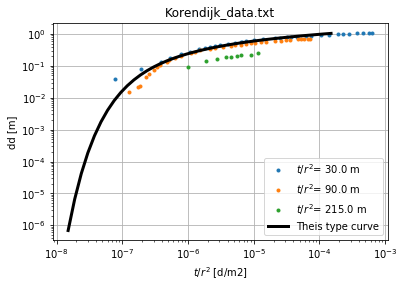

In [74]:
# The unique values of the first column also define the number of piezometers we have.
distances = np.unique(data[:, 0])

# set up the figure
plt.title(fname)
plt.ylabel('dd [m]')
plt.xlabel('$t/r^2$ [d/m2]')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# plt the data for each piezometer
for r in distances:
    I = data[:, 0] == r # this is logical indexing

    # select the desired times
    t = data[I,2] # [d]
    
    plt.plot(t / r**2, data[I,3], '.',
             label='$t/r^2$= {:.1f} m'.format(r)) # '.' means plot as dots

# Two constants that we optimize by trial and error
# until the measurements and the data match as well s possible
A = .165           # we will plot A * W(u)
B = 0.00000015     # we'll use B * (1/u) for the horizontal axis of the Type curve

u = np.logspace(-3, 1, 41)

# plot shifted type curve
plt.plot(B *1/u, A * exp1(u), 'k', lw=3, label='Theis type curve' )

plt.legend()
plt.show()

## Interpretation of the results (getting $kD$ and $S$)

We plotted $A W(u)$ to make the Theis type curve match drawdown $s$. This implies
$$ s = A \,W(u) $$
while the Theis drawdown is
$$ s  = \frac Q {4 \pi kD} W(u) $$
So that
$$A = \frac Q {4 \pi kD}$$
And, because we now found $A$ by trial and error, we have $kD$ from
$$ kD  = \frac Q {4 \pi A} $$

We also make the Theis curve match the data by not using $1/u$ but $B \times 1/u$ on the horizontal axis, this way making the type curve's horizontal axis the same as the $t / r^2$ in the data graph.

Therefore we have
$$ \frac t {r^2} = \frac B u = B \frac {4 kD t} {r^2 S} = B \frac {4 kD } S  \left( \frac t {r^2} \right) $$
This implies
$$ B \frac {4 kD} S = 1 $$
so that
$$ S = 4 kD B$$
With $B$ and $kD$ known, this yields $S$.

In [75]:
# Putting this in practice using the actual extraction Q
Q = 760 # m3/d

# Getting kD first, using optimized value of A
kD = Q / (4 * np.pi * A)
print('kD = {:.0f} m2/d'.format(kD))

# Then with kD now known and the optimized value of B
S = 4* B * kD
print('S  = {:.3g} [-]'.format(S))

kD = 367 m2/d
S  = 0.00022 [-]


## Intepretation using the simplified solution of Theis

The simplified Theis solution was obtained from its power series expansion and ignoring all terms of $u$ and higher powers of $u$. This yielded

$$W(u) \approx \ln \left( \frac {2.25 kD t} {r^2 S} \right) $$

which is value for large-enough $t / r^2$, when the Theis drawdown increases linarly with the log of time. This is easily shown by drawing the type curve with a linear vertical and a logarithmic horizontal axis.


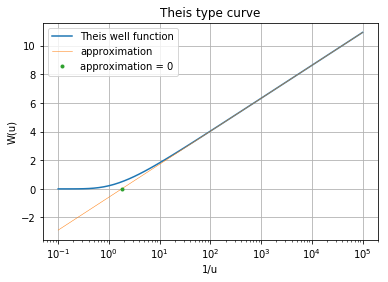

In [76]:
# get u values to use on the x-axis
u = np.logspace(-5, 1, 61)

# set up the figure
plt.title('Theis type curve')
plt.xlabel('1/u')
plt.ylabel('W(u)')
plt.xscale('log')
#plt.yscale('log')
plt.grid()

plt.plot(1/u, exp1(u), label='Theis well function') # plot well function versus 1/u
plt.plot(1/u, np.log(0.56 / u), lw=0.5, label='approximation')
plt.plot(4/2.25, 0, '.', label='approximation = 0') # inter section of straigh line approximation with zero
plt.legend()
plt.show()

As the curve shows, the point where the oblique straigt-line part of the drawdown curve intersects the zero-drawdown $W(u)=0$ is about $u=1$.

The exact point follows from
$$ 1 = \frac {2.25 kD t} {r^2 S} = \frac {2.25} 4 \frac { 4 kD t} {r^2 S} = \frac {0.56} u $$
Hence,
$$u \approx 1.8$$
which can also be read from the intesection given by the orange line in the figure above.

Plot the data versus log $t/r^2$

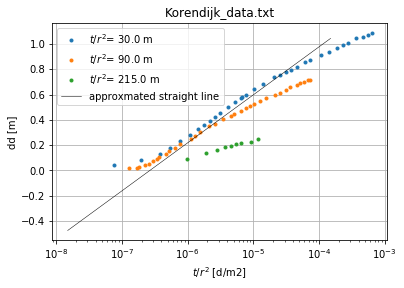

In [78]:
# The unique values of the first column also define the number of piezometers we have.
distances = np.unique(data[:, 0])

# set up the figure
plt.title(fname)
plt.ylabel('dd [m]')
plt.xlabel('$t/r^2$ [d/m2]')
plt.xscale('log')
#plt.yscale('log')
plt.grid()

# plt the data for each piezometer
for r in distances:
    I = data[:, 0] == r # this is logical indexing

    # select the desired times
    t = data[I,2]
    
    plt.plot(t / r**2, data[I,3], '.',
             label='$t/r^2$= {:.1f} m'.format(r)) # '.' means plot as dots

# Two constants that we optimize by trial and error
# until the measurements and the data match as well s possible
A = .165           # we will plot A * W(u)
B = 0.00000015     # we'll use B * (1/u) for the horizontal axis of the Type curve

u = np.logspace(-3, 1, 41)

# plot shifted type curve
plt.plot(B *1/u, A * np.log(0.56 / u), 'k', lw=0.5, label='approxmated straight line' )

plt.legend()
plt.show()

we get the transmissivty from the drawdown per log-cycle of the straight portion of the data curve (here the black line). It is read from the curve, i.e. about 0.39 m

$$ s(10t) - s(t) = \frac Q {4 \pi kD} \left(
\ln \frac {2.25 kD 10 t} {r^2 S} -
\ln \frac {2.25 kD t} {r^2 S} \right) =
\frac Q {4 \pi kD} \ln 10 = \frac {2.3 Q} {4 \pi kD}$$

Hence,

$$ kD =  \frac {2.3 Q} {4 \pi \left( s(10t) - s(t)\right)} $$

In [79]:
kD = 2.3 * Q / (4 * np.pi * 0.39)
'kD = {:.0f} m2/d'.format(kD)

'kD = 357 m2/d'

The storage coefficient follows from the intersection of the approximated well function (i.e. the ln(...)) with zero.

$s = 0 \rightarrow \ln(..) = 0$, therefore, the argument of the log is 1 for $t/r^2 = (t /r^2)_0$

$$ \frac {2.25 kD t_0} {r^2 S} = 1 $$ 
Hence,
$$ S = 2.25 kD \left( \frac t {r^2} \right)_0 $$

From the graph we read $(t/r^2)_0 = 3\times10^{-7}$

In [80]:
S = 2.25 * kD * 3e-7
'S = {:.3g}'.format(S)

'S = 0.000241'

As can be see, the intepretation using the simplified straight line approximation of the Theis curve leads to the same results. That is, almost the same results. The differces are due to the error in reading the data from the graph. These errors are negligible compared to the other uncertainties, like the differences between the drawdown curves of the individual piezometers which should theoretically fall on the same line. They do not because the real-world aquifer is not as uniform as the analytial solution assumes.

## Bibliography

Kruseman, G.P. & N.D. de Ridder (1995) Pumping test analysis. is on the Internet.